Bishop’s University
Department of Computer Science
CS503 – Data Visualization
HW4 – Map and Network and Data Visualization
NAME:MABLINE ANDREA
GROUP NAME: HW4 T

Problem: US-Covid19 Visualization and Analysis.
Hypothesis: There exists a correlation between the spatial distance among US states and the
number of COVID-19 cases reported

Objective: Validate the hypothesis visually using Map and Network data Analysis.

Data:
− Provided in a CSV file are COVID-19 cases recorded over a period in various US states.
− Python demos (references 1 and 3) illustrate the generation of a heatmap depicting COVID-
19 cases, and also community detection.
Tasks: Data Analysis Using Adjacency Matrix:

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('C:/Users/Andrea/Desktop/2024 - DATA VISUALIZATION/us_counties_covid19_daily.csv')

In [37]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [38]:
df.tail()

,date,county,state,fips,cases,deaths
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0
800436,2020-12-05,Weston,Wyoming,56045.0,419,2.0


In [39]:
df.shape

(800437, 6)

In [40]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

1) Compute two metrics for each state: TNC (Total Number of Confirmed Cases) and TND (Total
Number of Deaths)

In [41]:
state_totals = df.groupby('state').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()


state_totals = state_totals.rename(columns={'cases': 'TNC', 'deaths': 'TND'})

print(state_totals)

                       state        TNC        TND
0                    Alabama   24024159   413394.0
1                     Alaska    1747498     8638.0
2                    Arizona   35564144   845363.0
3                   Arkansas   13267810   203418.0
4                 California  127488272  2479213.0
5                   Colorado   15548407   432353.0
6                Connecticut   13042369   974773.0
7                   Delaware    3875709   123505.0
8       District of Columbia    2965627   127280.0
9                    Florida  107316623  2101392.0
10                   Georgia   47692834  1103484.0
11                      Guam     657603     7319.0
12                    Hawaii    1609360    20063.0
13                     Idaho    7286953    76386.0
14                  Illinois   59101931  1792154.0
15                   Indiana   24135379   732228.0
16                      Iowa   16403065   246482.0
17                    Kansas   10723922   128277.0
18                  Kentucky   

2) Save the computed values in a CSV file with three columns: state, TNC, and TND

In [42]:
csv_file_path = 'state_totals.csv'


state_totals.to_csv(csv_file_path, index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


3) Construct the Affinity Matrix A, where Aij represents the similarity between state "i" and state
"j" based on their TNC and TND.

In [43]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances



X = state_totals[['TNC', 'TND']].values


affinity_matrix = euclidean_distances(X)


print(affinity_matrix)


[[       0.         22280337.80552838 11548066.98184532 ...
  21171579.75573342  1389551.01675685 22500488.35359646]
 [22280337.80552838        0.         33826995.95611382 ...
   1109103.64812311 23662431.0736789    220263.7455166 ]
 [11548066.98184532 33826995.95611382        0.         ...
  32718073.24982229 10171045.9735333  34047095.08462424]
 ...
 [21171579.75573342  1109103.64812311 32718073.24982229 ...
         0.         22553872.06601973  1329073.55375728]
 [ 1389551.01675685 23662431.0736789  10171045.9735333  ...
  22553872.06601973        0.         23882621.30024466]
 [22500488.35359646   220263.7455166  34047095.08462424 ...
   1329073.55375728 23882621.30024466        0.        ]]


4) Convert the affinity matrix Aij to an Adjacency matrix Bij by:
Bij = 1 if Aij >= 0.5
Bij = 0 if Aij < 0.5

In [44]:
adjacency_matrix = np.where(affinity_matrix >= 0.5, 1, 0)


print(adjacency_matrix)


[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


5) Use the NetworkX Python library to generate the graph based on matrix B

In [45]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


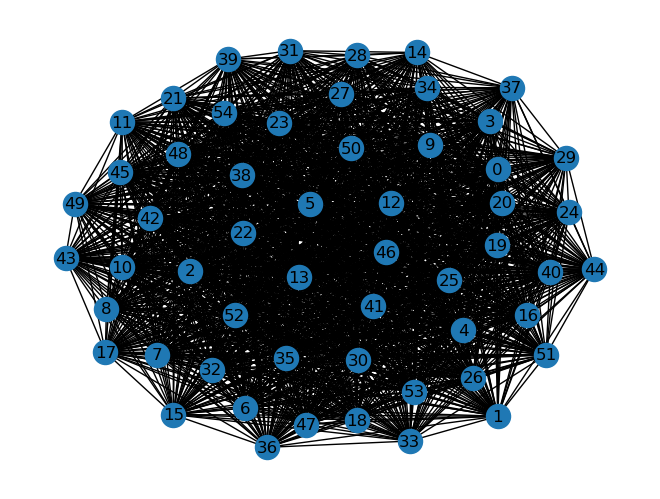

In [47]:
import networkx as nx
import numpy as np

#Create a new graph
G = nx.Graph()

for i in range(adjacency_matrix.shape[0]):
    for j in range(i+1, adjacency_matrix.shape[1]):
        if adjacency_matrix[i][j] == 1:
            G.add_edge(i, j)

#Draw the graph
nx.draw(G, with_labels=True)



6) Display the graph and label the nodes with the initials of the state names.

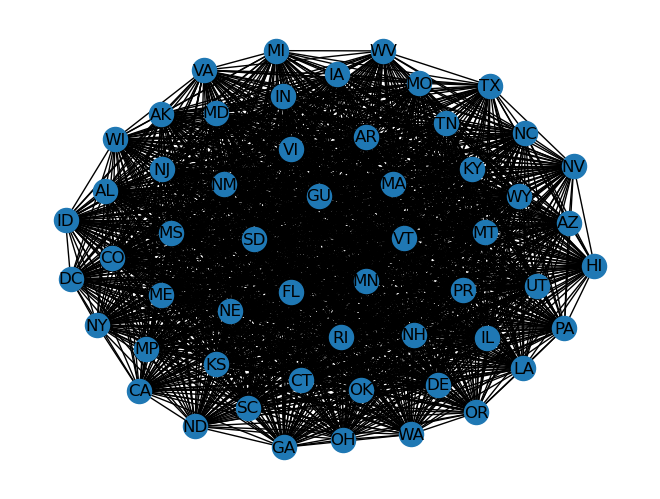

In [48]:
state_initials = {
    0: 'AL', 1: 'AK', 2: 'AZ', 3: 'AR', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DE', 8: 'DC', 9: 'FL',
    10: 'GA', 11: 'GU', 12: 'HI', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA',
    20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV',
    30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'MP', 37: 'OH', 38: 'OK', 39: 'OR',
    40: 'PA', 41: 'PR', 42: 'RI', 43: 'SC', 44: 'SD', 45: 'TN', 46: 'TX', 47: 'UT', 48: 'VT', 49: 'VI',
    50: 'VA', 51: 'WA', 52: 'WV', 53: 'WI', 54: 'WY'
}


nx.draw(G, labels=state_initials, with_labels=True)


7)Identify communities within the graph, where each community represents a cluster of similar
states, and visualize these clusters.


8) Change the value of 𝜎 and display the corresponding community detection results.


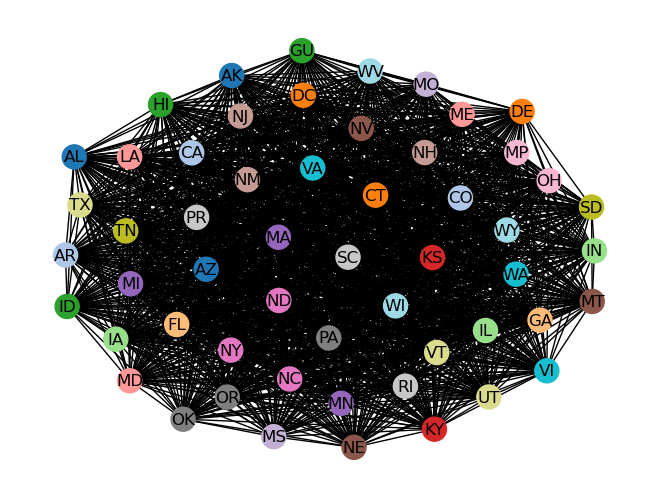

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import community


sigma = 4


communities = community.best_partition(G, resolution=sigma)

nx.draw(G, labels=state_initials, with_labels=True, node_color=list(communities.values()), cmap=plt.cm.tab20)
plt.show()


9) Use Gephi software (reference 2) to address the aforementioned tasks, including displaying
screenshots of the network and identified communities.

10) Use the heatmap (reference 3) and the result of the community detection and try to determine
if two state that are geographically close exhibit a similar number of COVID-19 cases. Offer
a brief discussion on your findings.

In [50]:
import pandas as pd

covid_data = pd.read_csv('C:/Users/Andrea/Desktop/2024 - DATA VISUALIZATION/us_counties_covid19_daily.csv')
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [51]:
state_covid_data = covid_data.groupby(['state'],as_index=False)[["cases"]].sum()
state_covid_data.sort_values('cases', ascending = False).head()

,state,cases
4,California,127488272
46,Texas,119483867
9,Florida,107316623
33,New York,104506668
14,Illinois,59101931


In [52]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [53]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="bytescout", timeout=None)
def get_loc_coordinate(location):
    location = geolocator.geocode(query = location)

    return location.latitude, location.longitude

In [54]:
from tqdm.notebook import tqdm
tqdm.pandas()

state_covid_data[["lat", "long"]] = state_covid_data['state'].progress_apply(lambda x:
pd.Series([get_loc_coordinate(x)[0],
get_loc_coordinate(x)[1]
]
)
)
state_covid_data.head()

  0%|          | 0/55 [00:00<?, ?it/s]

,state,cases,lat,long
0,Alabama,24024159,33.258882,-86.829534
1,Alaska,1747498,64.445961,-149.680909
2,Arizona,35564144,34.395342,-111.763275
3,Arkansas,13267810,35.204888,-92.447911
4,California,127488272,36.701463,-118.755997


In [55]:
lat_longs = list(map(list, zip(state_covid_data["lat"],
state_covid_data["long"],
state_covid_data["cases"]
)
)
)
lat_longs[:5]

[[33.2588817, -86.8295337, 24024159],
 [64.4459613, -149.680909, 1747498],
 [34.395342, -111.763275, 35564144],
 [35.2048883, -92.4479108, 13267810],
 [36.7014631, -118.755997, 127488272]]

In [56]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [57]:
import folium
map_object = folium.Map(location = [33.2588817, -86.8295337], zoom_start = 4)
from folium.plugins import HeatMap
HeatMap(lat_longs).add_to(map_object)
map_object